In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import cv2
import os
import random
import pylab as pl


In [2]:
builder = tfds.builder('voc2007')
builder.download_and_prepare()
datasets = builder.as_dataset()
train_data, val_data, test_data = datasets['train'], datasets['validation'], datasets['test']

In [ ]:
labels_p=("aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor")

In [3]:
 result = []
def fd():
    for dirname, _, filenames in os.walk('C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp'):
        for filename in filenames:
           result.append(os.path.join(dirname, filename))    

In [4]:
fd()

In [5]:
print(result)

['C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000005.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000007.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000009.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000012.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000016.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000017.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000019.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000020.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000021.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000023.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000024.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000026.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000030.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000032.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000033.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000034.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\000035.jpg', 'C:/Users/apoor/bow/VOCdevkit/VOC2007/ppp\\0000

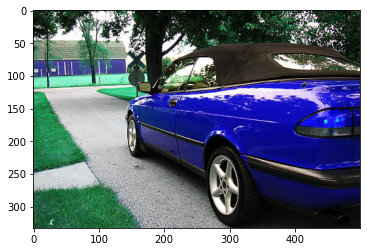

In [6]:
des_list=[]

orb=cv2.ORB_create()
im=cv2.imread(result[1])

plt.imshow(im)

In [7]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

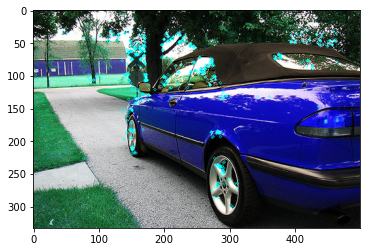

In [8]:
kp = orb.detect(im,None)
kp, des = orb.compute(im, kp)
img=draw_keypoints(im,kp)

for image_pat in result:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [10]:
descriptors=des_list[0][1]
for result,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [11]:
descriptors.shape

(19792, 32)

In [12]:
descriptors_float=descriptors.astype(float)

In [13]:
from scipy.cluster.vq import kmeans,vq

In [14]:
k=200
voc,variance=kmeans(descriptors_float,k,1)

In [19]:
im_features=np.zeros((len(result),k),"float32")
for i in range(len(result)):
    words,distance=vq(des_list[0][1],voc)
    for w in words:
        im_features[i][w]+=1,
print(im_features)        

[[0. 3. 0. ... 4. 3. 1.]
 [0. 3. 0. ... 4. 3. 1.]
 [0. 3. 0. ... 4. 3. 1.]
 ...
 [0. 3. 0. ... 4. 3. 1.]
 [0. 3. 0. ... 4. 3. 1.]
 [0. 3. 0. ... 4. 3. 1.]]


In [23]:
im_features.shape

(51, 200)